In [3]:
import numpy as np
from upkit import Histo, Histo2D
import scipy as sp
import pandas as pd
from signal_NN.signal_classifier import SidebandClassifier
from signal_NN.utils import *
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow import keras

def compute_pi_s(MM, y, bin_edges):
    bin_id = np.digitize(MM, bin_edges) - 1
    num_bins = len(bin_edges) - 1

    pi_s = np.zeros(num_bins)
    pi_s_unc = np.zeros(num_bins)

    for b in range(num_bins):
        mask = bin_id == b
        if np.any(mask):
            frac = y[mask].mean()
            pi_s[b] = frac
            pi_s_unc[b] = 0.05 * frac + 1e-3  # toy uncertainty
        else:
            pi_s[b] = 0.0
            pi_s_unc[b] = 1e-3
    return pi_s, pi_s_unc, bin_id

In [4]:
X_train, X_test, y_train, y_test = generate_correlated_toy(num_events=2_000_000, signal_fraction=0.1)

bin_edges = np.linspace(.5, 1.5, 50)

classifier = SidebandClassifier(bin_edges, SB_low=(0.5, 0.8), SB_high=(1.1, 1.5))

model = classifier.train(X_train, X_train[:, 0])

pi_s, pi_s_unc, bin_id_train = compute_pi_s(X_train[:, 0], y_train, bin_edges)

Q, scores = classifier.predict_Q_all(X_test, X_test[:, 0], pi_s)

Epoch 1/50


2025-11-17 13:30:16.610811: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


313/313 [==============================] - 2s 5ms/step - loss: 0.6629 - accuracy: 0.6003 - val_loss: 0.5143 - val_accuracy: 0.9970
Epoch 2/50
313/313 [==============================] - 2s 5ms/step - loss: 0.6554 - accuracy: 0.6003 - val_loss: 0.4870 - val_accuracy: 1.0000
Epoch 3/50
313/313 [==============================] - 2s 5ms/step - loss: 0.6545 - accuracy: 0.6004 - val_loss: 0.4851 - val_accuracy: 1.0000
Epoch 4/50
313/313 [==============================] - 2s 6ms/step - loss: 0.6542 - accuracy: 0.6004 - val_loss: 0.4979 - val_accuracy: 1.0000
Epoch 5/50
313/313 [==============================] - 2s 5ms/step - loss: 0.6540 - accuracy: 0.6004 - val_loss: 0.5126 - val_accuracy: 1.0000
Epoch 6/50
313/313 [==============================] - 2s 6ms/step - loss: 0.6539 - accuracy: 0.6004 - val_loss: 0.5038 - val_accuracy: 1.0000
Epoch 7/50
313/313 [==============================] - 2s 6ms/step - loss: 0.6538 - accuracy: 0.6004 - val_loss: 0.5093 - val_accuracy: 1.0000
Epoch 8/50
313/31

In [6]:
from signal_NN.diagnostics import QFactorDiagnostics

diag = QFactorDiagnostics(classifier, X_test, X_test[:,0], pi_s, pi_s_unc, bin_edges)
diag.run_ensemble(X_test, Q, K=1)

Training ensemble member 1/1...


(array([0., 0., 0., ..., 0., 1., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32))

In [13]:
diag.yield_table(y_test)


,MM_center,True_Yield,Q_Mean_Yield,Rel_Bias
0,0.510204,0.0,0.0,NaN
1,0.530612,0.0,0.0,NaN
2,0.551020,0.0,0.0,NaN
3,0.571429,0.0,0.0,NaN
4,0.591837,0.0,0.0,NaN
5,0.612245,0.0,0.0,NaN
6,0.632653,0.0,0.0,NaN
7,0.653061,0.0,0.0,NaN
8,0.673469,0.0,0.0,NaN
9,0.693878,0.0,0.0,NaN


In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_MM_weighted(MM, Q, bins=80, range=(0.65, 1.25)):

    # Unweighted (= total data)
    fig, ax = plt.subplots(1, 2, figsize=(12,10))
    ax[0].hist(MM, bins=bins, range=range, histtype='step', alpha=0.7)

    # Weighted by Q-factors (= estimated signal)
    ax[0].hist(MM, bins=bins, weights=Q, range=range, histtype='step', alpha=0.7, label='Predicted Signal (Q-weighted)')

    # Weighted (1-Q) = background estimate
    ax[0].hist(MM, bins=bins, weights=(1-Q), range=range, histtype='step', alpha=0.7, label='Predicted Background (1-Q)')

    ax[1].hist(MM, bins=bins, range=range, histtype='step', alpha=0.7)

    # Weighted by Q-factors (= estimated signal)
    ax[1].hist(MM[y_test==1], bins=bins, range=range, histtype='step', alpha=0.7, label='True Signal (Q-weighted)')

    # Weighted (1-Q) = background estimate
    ax[1].hist(MM[y_test==0], bins=bins, range=range, histtype='step', alpha=0.7, label='True Background (1-Q)')

    ax[0].set_xlabel("MM [GeV]")
    ax[1].set_xlabel("MM [GeV]")
    ax[0].set_ylabel("Counts")
    ax[1].set_ylabel("Counts")
    ax[0].legend()
    ax[1].legend()
    plt.tight_layout()
    plt.show()

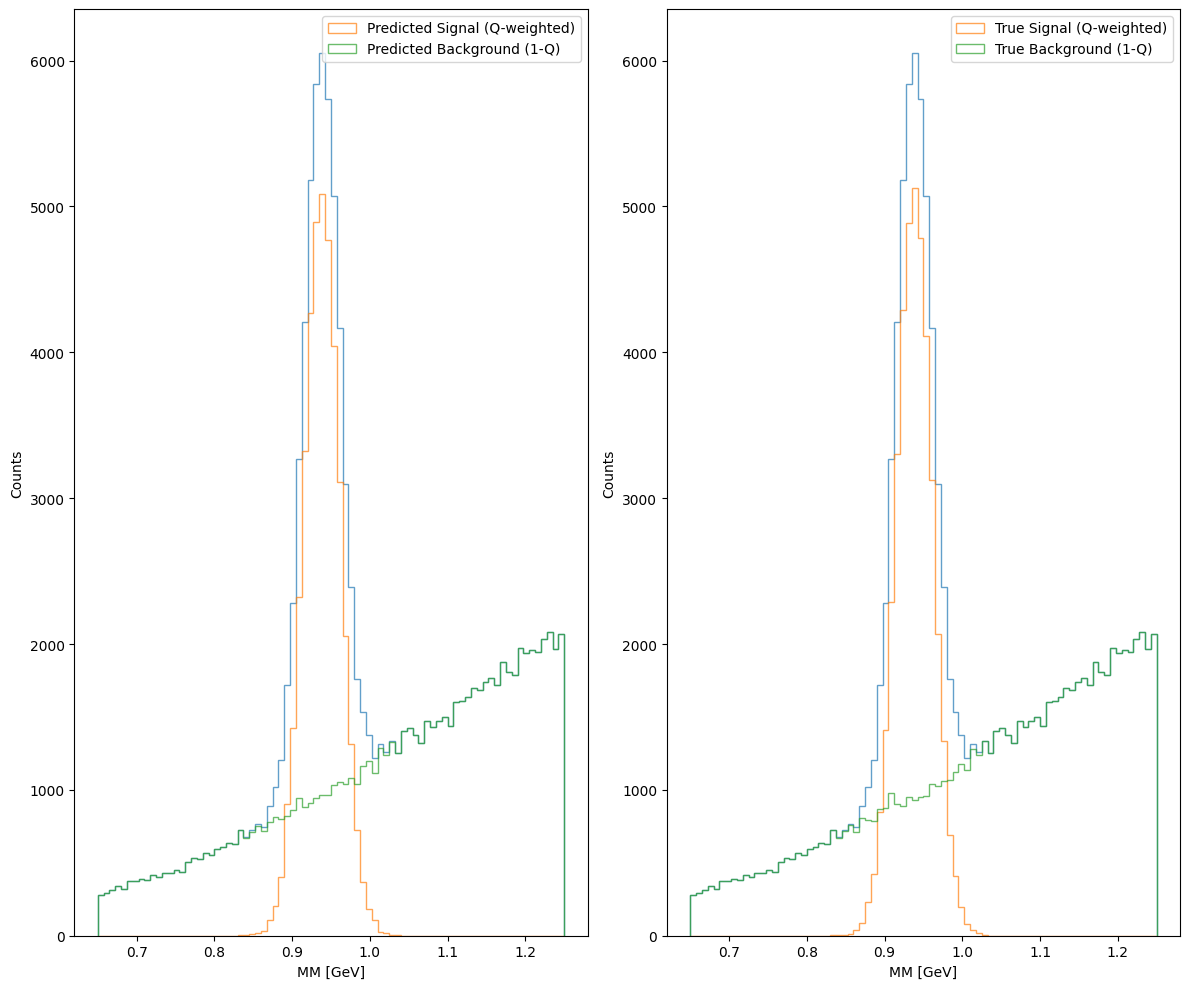

In [19]:
# %matplotlib widget
plot_MM_weighted(X_test[:, 0], Q)

In [40]:
def plot_feature_distributions(X, y_true, Q_pred, name="feature_distributions"):
    n_features = X.shape[1]
    ncols = 2      # left = signal, right = background
    nrows = n_features

    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 3*nrows))
    if nrows == 1:
        axes = np.array([axes])  # ensure 2D indexing

    for i in range(n_features):
        ax_sig = axes[i, 0]
        ax_bkg = axes[i, 1]
        fname = f"var_{i}"

        # consistent range for the feature
        xmin, xmax = X[:, i].min(), X[:, i].max()

        # ------------------------------
        # LEFT: Signal comparison
        # ------------------------------
        ax_sig.hist(
            X[y_true==1, i],
            bins=60,
            range=(X[y_true==1, i].min(), X[y_true==1, i].max()),
            density=True,
            histtype='step',
            color='red',
            label='True Signal'
        )
        ax_sig.hist(
            X[:, i],
            bins=60,
            range=(X[y_true==1, i].min(), X[y_true==1, i].max()),
            density=True,
            weights=Q_pred,
            histtype='step',
            color='blue',
            label='Predicted Signal'
        )
        ax_sig.set_title(f"{fname} — Signal")
        ax_sig.legend()

        # ------------------------------
        # RIGHT: Background comparison
        # ------------------------------
        ax_bkg.hist(
            X[y_true==0, i],
            bins=60,
            range=(X[y_true==0, i].min(), X[y_true==0, i].max()),
            density=True,
            histtype='step',
            color='orange',
            label='True Background'
        )
        ax_bkg.hist(
            X[:, i],
            bins=60,
            range=(X[y_true==0, i].min(), X[y_true==0, i].max()),
            density=True,
            weights=(1 - Q_pred),
            histtype='step',
            color='green',
            label='Predicted Background'
        )
        ax_bkg.set_title(f"{fname} — Background")
        ax_bkg.legend()

    fig.tight_layout()
    return fig

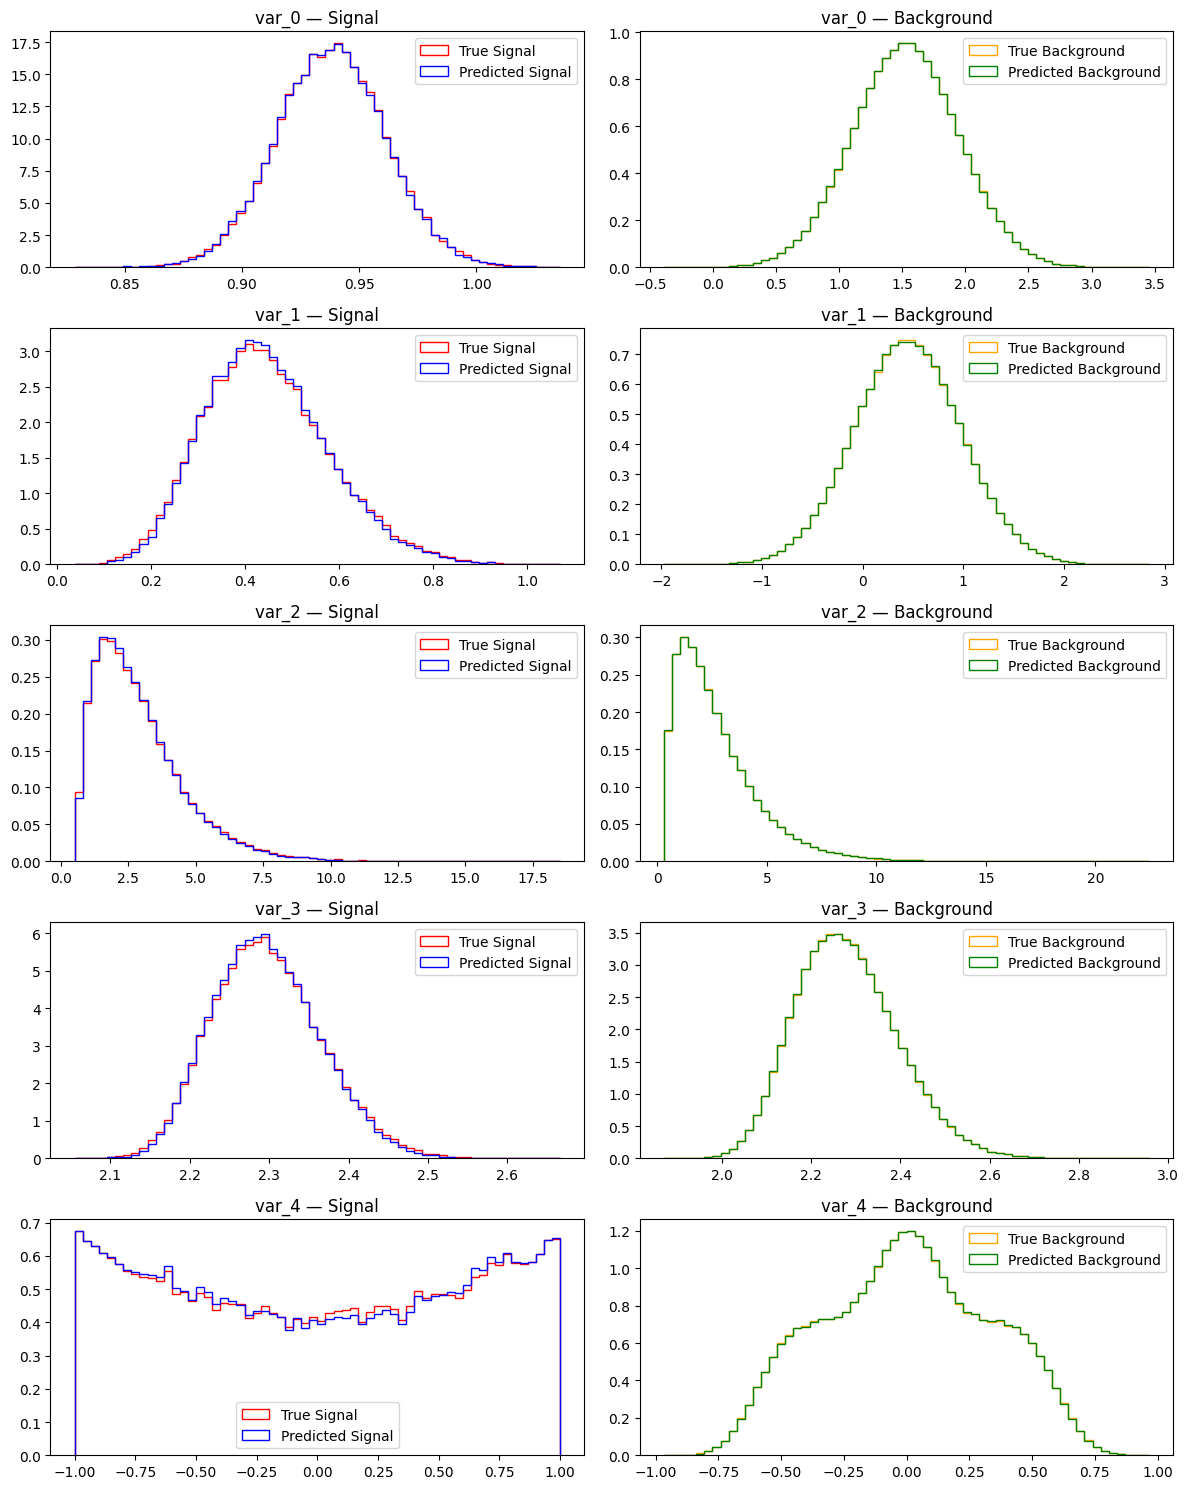

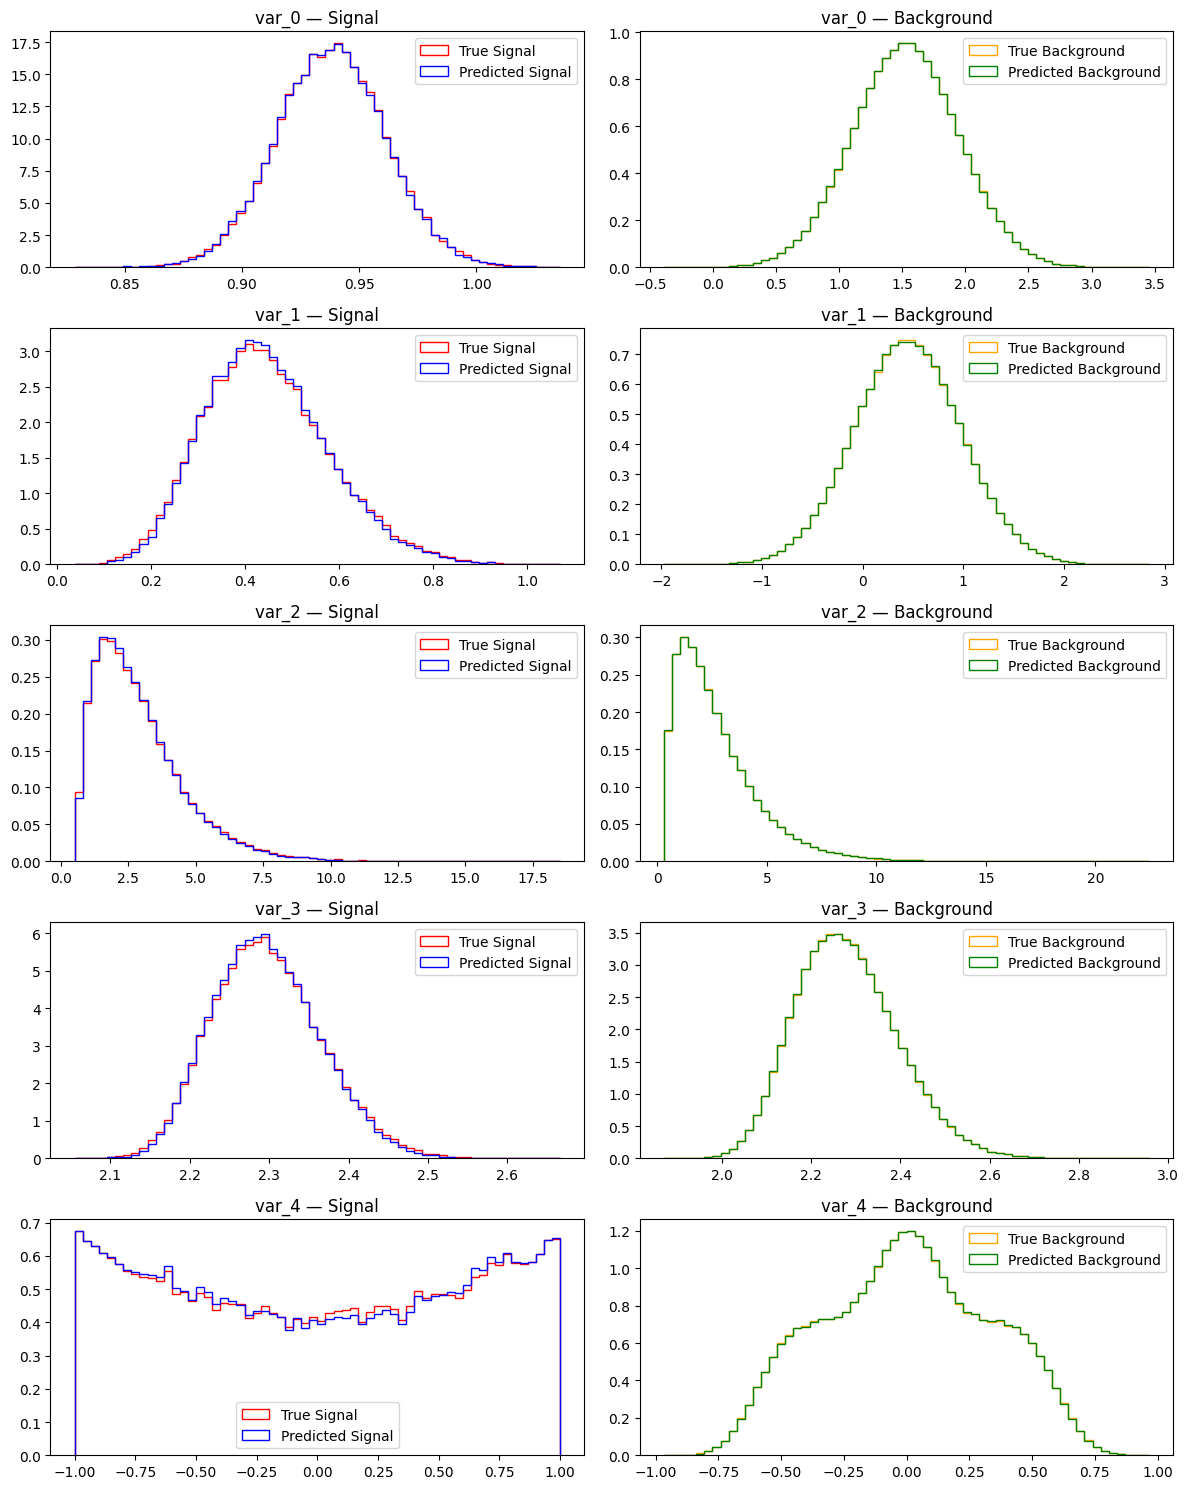

In [41]:
plot_feature_distributions(X_test, y_test, Q)

In [44]:
MM = X_test[:, 0]
Q2_bins = np.quantile(MM[MM > 0], np.linspace(0, 1, 11))

In [45]:
Q2_bins


array([0.00501337, 0.92633528, 1.01557488, 1.20533752, 1.34505642,
       1.4672169 , 1.58362163, 1.70558659, 1.8458236 , 2.03814313,
       3.45673439])

In [58]:
def plot_MM_weighted_Q2(MM, Q, Q2_bins, bins=80, fit_range=(0.65, 1.25)):

    num_Q2_bins = len(Q2_bins) - 1

    fig, axes = plt.subplots(num_Q2_bins, 1, figsize=(8, 4*num_Q2_bins))

    for i in range(len(Q2_bins) - 1):
        ax = axes[i]
        bin_mask = (MM >= Q2_bins[i]) & (MM < Q2_bins[i+1])
        MM_bin = MM[bin_mask]
        Q_bin = Q[bin_mask]

        ax.hist(MM_bin, bins=bins, range=fit_range, histtype='step', alpha=0.7, label='Total Data')
        ax.hist(MM_bin, bins=bins, weights=Q_bin, range=fit_range, histtype='step', alpha=0.7, label='Predicted Signal (Q-weighted)')
        ax.hist(MM_bin, bins=bins, weights=(1-Q_bin), range=fit_range, histtype='step', alpha=0.7, label='Predicted Background (1-Q)')

        ax.set_title(f"Q² Bin {i+1}: [{Q2_bins[i]:.2f}, {Q2_bins[i+1]:.2f}]")
        ax.set_xlabel("MM [GeV]")
        ax.set_ylabel("Counts")
        ax.legend()

    plt.tight_layout()
    plt.show()

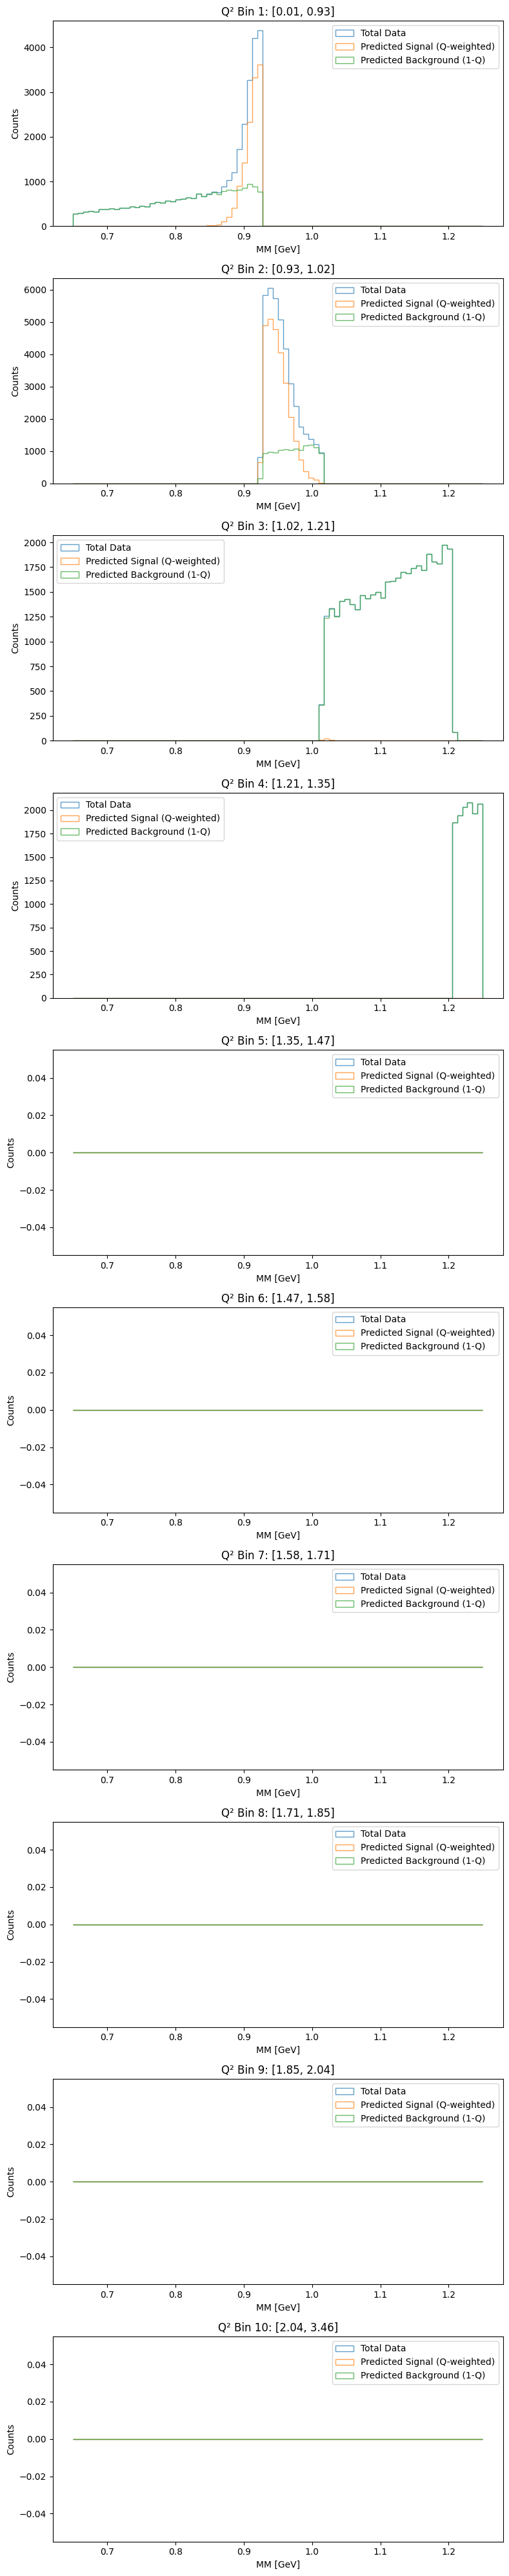

In [59]:
plot_MM_weighted_Q2(MM, Q, Q2_bins)

In [48]:
len(Q2_bins)

11

In [49]:
for b in range(len(Q2_bins) - 1):
    print(f"Bin {b}: [{Q2_bins[b]:.3f}, {Q2_bins[b+1]:.3f}]")

Bin 0: [0.005, 0.926]
Bin 1: [0.926, 1.016]
Bin 2: [1.016, 1.205]
Bin 3: [1.205, 1.345]
Bin 4: [1.345, 1.467]
Bin 5: [1.467, 1.584]
Bin 6: [1.584, 1.706]
Bin 7: [1.706, 1.846]
Bin 8: [1.846, 2.038]
Bin 9: [2.038, 3.457]
